# Sankey Traces - Simple Example

This tutorial consists of a very simple Sankey Traces example from a specific sample data

## Imports

In this code, we use
- Pandas dataframes
- Plotly graph objects

Matplotlib, my de facto choice for graphing, doesn't have support for sankey traces.

In [48]:
# Imports
# We use padas dataframes and plotly graph objects

import pandas as pd
import plotly.graph_objects as go


## Read Data
The data file consists of GST data from Aug-24 and Aug-23 for comparison. We use only Aug-24 data in this code

In [60]:
# data file
datafile_url = "https://huggingface.co/datasets/raju-alluri/India-GST-Receipts-Data-2024/resolve/main/GST_Data_India_2024_a.csv"

In [61]:
df=pd.read_csv(datafile_url)

### Observe data

In [62]:
df.head()

,State/UT,GSTAggregator,Aug-23,Aug-24
0,Jammu and Kashmir,Central GST,523,569
1,Himachal Pradesh,Central GST,725,827
2,Punjab,Central GST,1813,1936
3,Chandigarh,Central GST,192,244
4,Uttarakhand,Central GST,1353,1351


In [52]:
df.describe()

,Aug-23,Aug-24
count,38.000000,38.000000
mean,3013.210526,3289.105263
std,4558.768813,5099.084904
min,3.000000,2.000000
25%,189.750000,207.750000
50%,1250.500000,1352.000000
75%,4201.250000,4381.750000
max,23282.000000,26367.000000


## Make data ready for Sankey Traces

In [53]:
# Extract all source and target nodes

nodes=pd.DataFrame(pd.concat([df['State/UT'], df['GSTAggregator']]).unique())

# Set column name for nodes

nodes.columns = ['node_name']

In [54]:
# Prepare an index of all nodes

node_to_index = {node: idx for idx, node in enumerate(nodes['node_name'])}


In [55]:
# Create mapping for source nodes

df['sources'] = df['State/UT'].map(node_to_index)

# Create mapping for target nodes

df['targets'] = df['GSTAggregator'].map(node_to_index)


## Prepare data for graphing

In [56]:
# Prepare data for sankey traces

labels = nodes['node_name'].tolist()
sources = df['sources'].tolist()
targets = df['targets'].tolist()
values = df['Aug-24'].tolist()

## Set data into graph object

In [57]:

# Set sankey data

sankey_data = go.Sankey(
    # Configure the nodes in sankey traces
    node=dict(
        pad=50,
        thickness=40,
        line=dict(color="black", width=1),
        label=labels,
    ),
    # Configure the links in sankey traces
    link=dict(
        source=sources,
        target=targets,
        value=values,
    )
)

In [58]:
# Create the plotly graph object figure and add the sankey trace data
fig = go.Figure(data=[sankey_data])


## Refine graph with suitable options

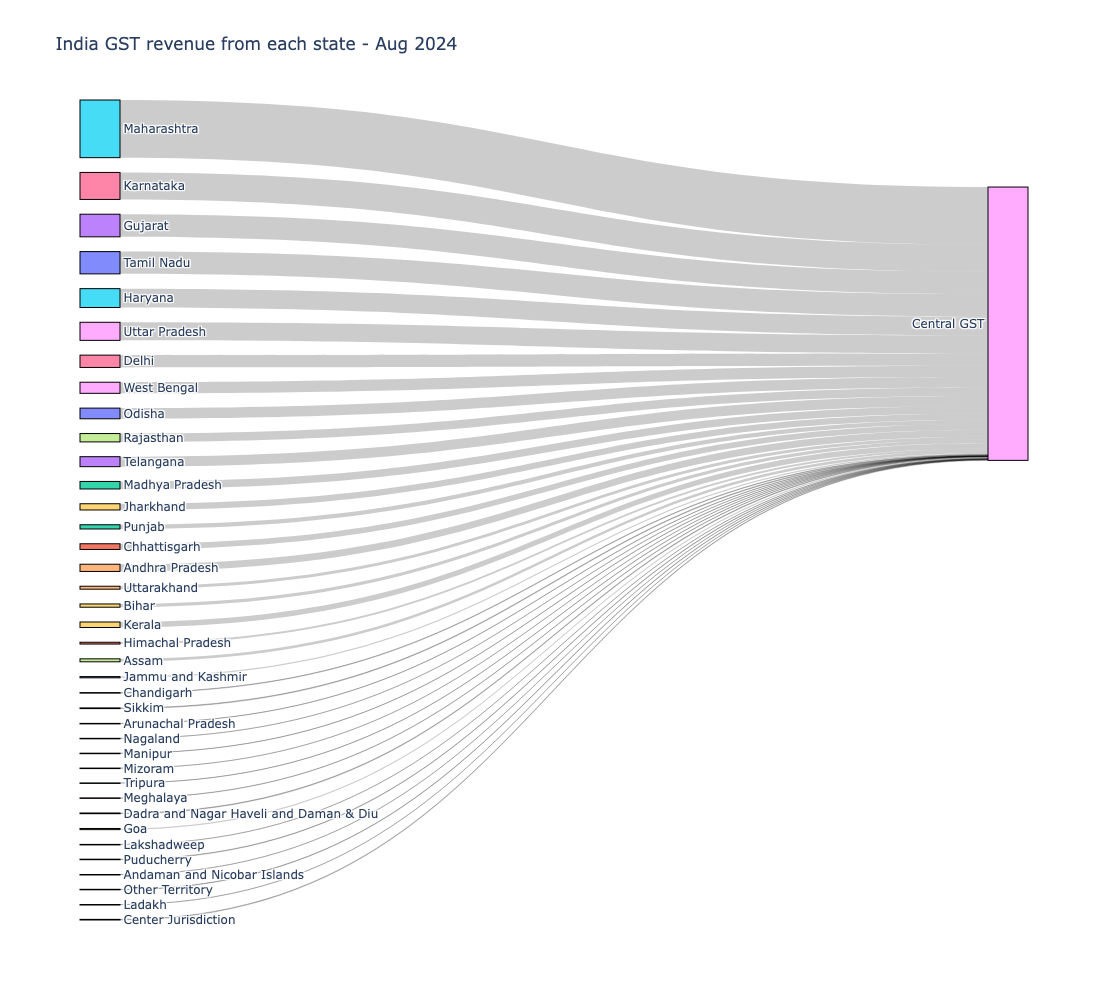

In [69]:

# Update layout with proper height for a cleaner look; experiment with values that look best on your screen

fig.update_layout(title_text="India GST revenue from each state - Aug 2024 ", font_size=12, height=1000)

# Display the figure
fig.show()
